# List of School Districts by Enrollment, Demographics
Data from [NCES](https://nces.ed.gov/ccd/districtsearch/) with number of students > 50000

In [1]:
ls data

ncesdata_DBB82454.csv      ncesdata_DBB82454.numbers
ncesdata_DBB82454.html     ncesdata_DBB82454.xls


In [20]:
import pandas as pd
#from bs4 import BeautifulSoup
import numpy as np

In [14]:
infile='data/ncesdata_DBB82454.csv'
dtype_dic={}#={'Students':'float64','Teachers':'float64','Schools':'float64','Student Teacher Ratio':'float64'}
df=pd.read_csv(infile,dtype=dtype_dic)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NCES District ID       1956 non-null   int64  
 1   State District ID      1956 non-null   object 
 2   District Name          1956 non-null   object 
 3   County Name            1956 non-null   object 
 4   Street Address         1956 non-null   object 
 5   City                   1956 non-null   object 
 6   State                  1956 non-null   object 
 7   ZIP                    1956 non-null   int64  
 8   ZIP 4-digit            1200 non-null   float64
 9   Phone                  1956 non-null   object 
 10  Students               1956 non-null   float64
 11  Teachers               1956 non-null   object 
 12  Schools                1956 non-null   float64
 13  Locale Code            1956 non-null   int64  
 14  Locale                 1956 non-null   object 
 15  Stud

,NCES District ID,State District ID,District Name,County Name,Street Address,City,State,ZIP,ZIP 4-digit,Phone,Students,Teachers,Schools,Locale Code,Locale,Student Teacher Ratio,Type
0,601620,CA-1964212,ABC Unified,Los Angeles County,16700 Norwalk Blvd.,Cerritos,CA,90703,1838.0,(562)926-5566,18889.0,842.75000,30.0,21,Suburb: Large,22.41000000,Regular School District
1,4807440,TX-221901,ABILENE ISD,Taylor County,P O BOX 981,ABILENE,TX,79604,981.0,(325)677-1444,15426.0,1078.47000,29.0,12,City: Midsize,14.30000000,Regular School District
2,4202040,PA-123460302,Abington SD,Montgomery County,970 Highland Ave,Abington,PA,19001,NaN,(215)884-4700,8291.0,573.55000,9.0,21,Suburb: Large,14.46000000,Regular School District
3,400891,AZ-90878,Academy of Mathematics and Science South Inc. ...,Pima County,1557 W PRINCE RD,TUCSON,AZ,85705,3023.0,(520)293-2676,5724.0,–,6.0,11,City: Large,†,Other Education Agency
4,801920,CO-1040,Academy School District No. 20 in the county o...,El Paso County,1110 CHAPEL HILLS DRIVE,COLORADO SPRINGS,CO,80920,3923.0,(719)234-1200,26050.0,1597.88000,41.0,11,City: Large,16.30000000,Regular School District


In [91]:
df=df[df['Students']<41000]

# Summary

In [92]:
df.nunique()

NCES District ID         1820
State District ID        1820
District Name            1801
County Name               643
Street Address           1801
City                     1478
State                      51
ZIP                      1763
ZIP 4-digit               996
Phone                    1816
Students                 1661
Teachers                 1773
Schools                    74
Locale Code                12
Locale                     12
Student Teacher Ratio     957
Type                        4
dtype: int64

In [93]:
df.describe()

,NCES District ID,ZIP,ZIP 4-digit,Students,Schools,Locale Code
count,1.820000e+03,1820.000000,1124.000000,1820.000000,1820.000000,1820.000000
mean,2.812920e+06,54630.515385,3434.010676,11913.798901,19.587363,21.951099
std,1.670819e+06,30150.489422,2383.738981,7749.702502,13.161848,9.149862
min,1.000050e+05,802.000000,1.000000,5003.000000,0.000000,11.000000
25%,1.201402e+06,29142.750000,1645.000000,6362.750000,11.000000,13.000000
50%,2.903155e+06,54982.000000,2968.500000,9000.500000,15.000000,21.000000
75%,4.216185e+06,82630.000000,4679.500000,14369.000000,24.000000,22.000000
max,7.800030e+06,99741.000000,9998.000000,40876.000000,103.000000,43.000000


In [16]:
## Cleanning 

In [94]:
cols=['NCES District ID','State','Students','Teachers','Schools','Student Teacher Ratio']
cols_num=['Students','Teachers','Schools']#,'Student Teacher Ratio']
ds=df[cols]
ds.loc[ds['Teachers'] =='–', 'Teachers'] = 0
ds.loc[ds['Teachers'] =='†', 'Teachers'] = 0
ds['Teachers']=ds['Teachers'].astype(float)
ds['Student Teacher Ratio']=ds['Students']/ds['Teachers']
ds.replace([np.inf, -np.inf], 0, inplace=True)
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 0 to 1955
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NCES District ID       1820 non-null   int64  
 1   State                  1820 non-null   object 
 2   Students               1820 non-null   float64
 3   Teachers               1820 non-null   float64
 4   Schools                1820 non-null   float64
 5   Student Teacher Ratio  1820 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 99.5+ KB


/var/folders/rh/4xd1337512l1025llqtt0d2h0000gn/T/ipykernel_18853/1174907515.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Teachers']=ds['Teachers'].astype(float)
/var/folders/rh/4xd1337512l1025llqtt0d2h0000gn/T/ipykernel_18853/1174907515.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Student Teacher Ratio']=ds['Students']/ds['Teachers']
/var/folders/rh/4xd1337512l1025llqtt0d2h0000gn/T/ipykernel_18853/1174907515.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [95]:
ds.describe()

,NCES District ID,Students,Teachers,Schools,Student Teacher Ratio
count,1.820000e+03,1820.000000,1820.000000,1820.000000,1820.000000
mean,2.812920e+06,11913.798901,739.235670,19.587363,16.502124
std,1.670819e+06,7749.702502,501.881641,13.161848,4.723745
min,1.000050e+05,5003.000000,0.000000,0.000000,0.000000
25%,1.201402e+06,6362.750000,413.390000,11.000000,13.765567
50%,2.903155e+06,9000.500000,564.590000,15.000000,15.572099
75%,4.216185e+06,14369.000000,890.022500,24.000000,18.681937
max,7.800030e+06,40876.000000,3172.300000,103.000000,91.097708


# Distributions/Description

## Number of Schools

count    1820.000000
mean       19.587363
std        13.161848
min         0.000000
25%        11.000000
50%        15.000000
75%        24.000000
max       103.000000
Name: Schools, dtype: float64

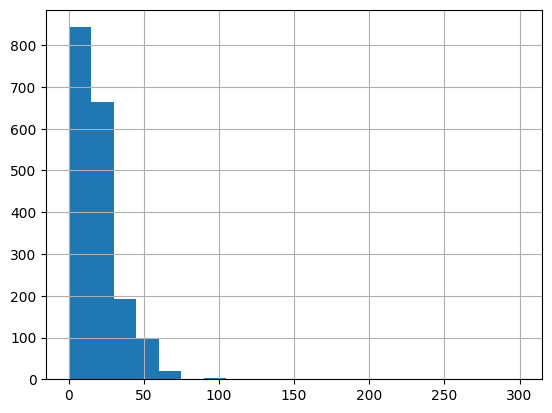

In [96]:
ds['Schools'].hist(range=[0,300],bins=20)
ds['Schools'].describe()

## Students

count     1820.000000
mean     11913.798901
std       7749.702502
min       5003.000000
25%       6362.750000
50%       9000.500000
75%      14369.000000
max      40876.000000
Name: Students, dtype: float64

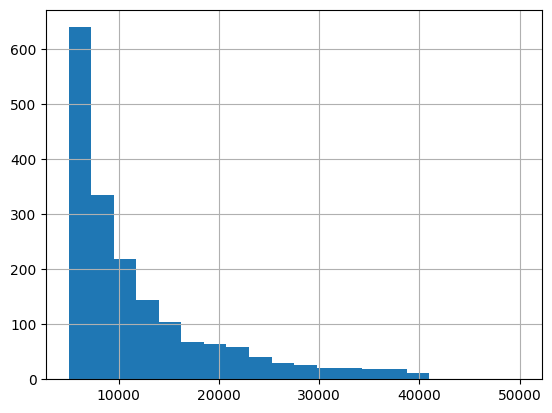

In [97]:
ds['Students'].hist(range=[5000,50000],bins=20)
ds['Students'].describe()

## Teachers

count    1820.000000
mean      739.235670
std       501.881641
min         0.000000
25%       413.390000
50%       564.590000
75%       890.022500
max      3172.300000
Name: Teachers, dtype: float64

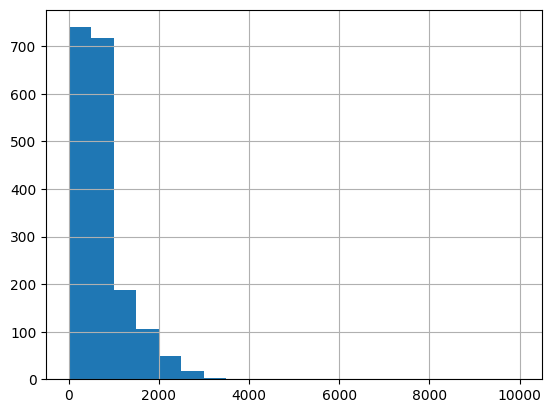

In [98]:
ds['Teachers'].hist(range=[0,10000],bins=20)
ds['Teachers'].describe()

## Student Teacher Ratio

count    1820.000000
mean       16.502124
std         4.723745
min         0.000000
25%        13.765567
50%        15.572099
75%        18.681937
max        91.097708
Name: Student Teacher Ratio, dtype: float64

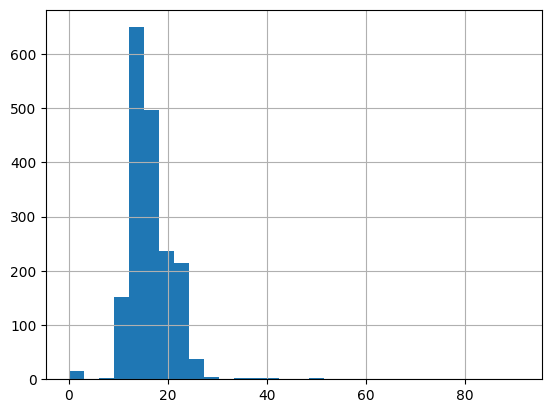

In [100]:
ds['Student Teacher Ratio'].hist(bins=30)
ds['Student Teacher Ratio'].describe()